<a href="https://colab.research.google.com/github/b62mp1/files/blob/main/Graphs%26Metrics/ARIMA/Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
from pandas_datareader import data as pdr
from google.colab import files
import math
from sklearn.metrics import mean_squared_error, r2_score
yf.pdr_override()

In [19]:
stock_name = "TSLA"
df=pdr.get_data_yahoo(stock_name, start='2020-01-01', end='2022-04-19').reset_index()
print("Number of rows and columns:", df.shape)
df.head(5)

[*********************100%***********************]  1 of 1 completed
Number of rows and columns: (578, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
1,2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
3,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
4,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500


In [20]:
series = df['Close']
# Create train data set
ind = df['Date'][int(0.80 * len(df['Date'].values))]
train_split_date = ind
train_split_index = np.where(df.Date == train_split_date)[0][0]
x_train = df.loc[df['Date'] <= train_split_date]['Close']

# Create test data set
test_split_date = ind
test_split_index = np.where(df.Date == test_split_date)[0][0]
x_test = df.loc[df['Date'] >= test_split_date]['Close']

dates = df.loc[df['Date'] >= test_split_date]['Date']

# Create valid data set (Here we are not using it))

valid_split_index = (train_split_index.max(),test_split_index.min())
x_valid = df.loc[(df['Date'] < test_split_date) & (df['Date'] > train_split_date)]['Close']

In [21]:
# Creating the model
from statsmodels.tsa.arima_model import ARIMA

# Create list of x train valuess
history = [x for x in x_train]

# establish list for predictions
model_predictions = []

# loop through every data point
for time_point in list(x_test.index[:]):
    model = ARIMA(history, order=(4,1,0)) # p = 4, d = 1, q = 0
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = x_test[time_point]
    history.append(true_test_value)

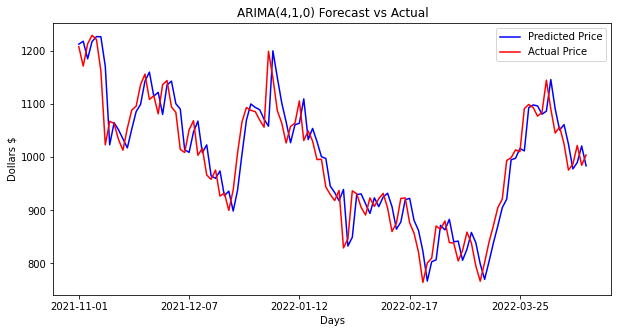

In [22]:
from datetime import datetime
date = [str(d)[:10] for d in dates[:]]
# Plot our predictions against the actual values for a visual comparison.
plt.figure(figsize=(10,5))

plt.plot(x_test.index[:], model_predictions[:], color='blue',label='Predicted Price')
plt.plot(x_test.index[:], x_test[:], color='red', label='Actual Price')
plt.ylabel('Dollars $')
plt.xlabel('Days')
plt.title('ARIMA(4,1,0) Forecast vs Actual')
#plt.xticks(x_test.index[-50:], date)
plt.xticks( x_test.index[::25], date[::25])
plt.legend()
plt.show()